# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [2]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx",  
                   na_values=[0],parse_dates=['Animal Birth', 'Application Date', 'License Issued Date', 'License Expired Date'])
df = df.iloc[:30000]
df

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647000,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647000,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713000,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417000,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707000,2014-09-12,2019-09-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,11372,Bella,F,Unknown,Goldendoodle,CREAM,WHITE,TAN,2010-07-01,Yes,No,Yes,2015-08-22 19:00:39.303000,2015-08-22,2016-09-27
29996,11417,Sadie,F,"Schnauzer, Miniature",NaN,BLACK,BROWN,NaN,2010-05-01,Yes,No,Yes,2015-08-22 19:03:08.003000,2015-08-22,2016-09-28
29997,11228,unknown,M,Pomeranian,NaN,Tan,White,NaN,2014-03-01,Yes,NaN,Yes,2015-08-22 19:04:56.720000,2015-08-22,2016-08-22
29998,11217,daisy,F,Unknown,NaN,GRAY,WHITE,BLACK,2009-01-01,Yes,No,Yes,2015-08-22 19:14:30.177000,2015-08-22,2016-08-05


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [3]:
df.info() #before slicing the dataset there were 81938 rows, but i couldnt show that because my jupyter notebook crashed many times

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Owner Zip Code          30000 non-null  int64         
 1   Animal Name             29939 non-null  object        
 2   Animal Gender           30000 non-null  object        
 3   Primary Breed           30000 non-null  object        
 4   Secondary Breed         3988 non-null   object        
 5   Animal Dominant Color   29885 non-null  object        
 6   Animal Secondary Color  20946 non-null  object        
 7   Animal Third Color      6629 non-null   object        
 8   Animal Birth            30000 non-null  datetime64[ns]
 9   Spayed or Neut          30000 non-null  object        
 10  Guard or Trained        19826 non-null  object        
 11  Vaccinated              30000 non-null  object        
 12  Application Date        30000 non-null  object

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [4]:
##each row is for a dog
## Animal Name is the name of the code
## owner zip code is the zip code of the owner of the animal

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [5]:
df.columns

Index(['Owner Zip Code', 'Animal Name', 'Animal Gender', 'Primary Breed',
       'Secondary Breed', 'Animal Dominant Color', 'Animal Secondary Color',
       'Animal Third Color', 'Animal Birth', 'Spayed or Neut',
       'Guard or Trained', 'Vaccinated', 'Application Date',
       'License Issued Date', 'License Expired Date'],
      dtype='object')

In [6]:
#question one: i would check the names to see if there are any very common names
##df['Animal Name'].value_counts().head(10)
#question two: i would check the number of dogs that are spayed 
##df['Spayed or Neut'].value_counts()
#question three: i would do the same for vaccination
##df['Vaccinated'].value_counts()

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [7]:
df['Primary Breed'].value_counts().head(10)

Primary Breed
Unknown                                 4777
Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Name: count, dtype: int64

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

...maybe "unknown" should just count as missing data?

In [27]:
#(?i) regex flag for case insensitivity so that it includes unknown in every type of form
df.replace(r'(?i)^\s*unknown\s*$', np.nan, regex=True, inplace=True)
df['Primary Breed'].value_counts().head(10)

Primary Breed
Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Beagle                                   546
Name: count, dtype: int64

<Axes: ylabel='Primary Breed'>

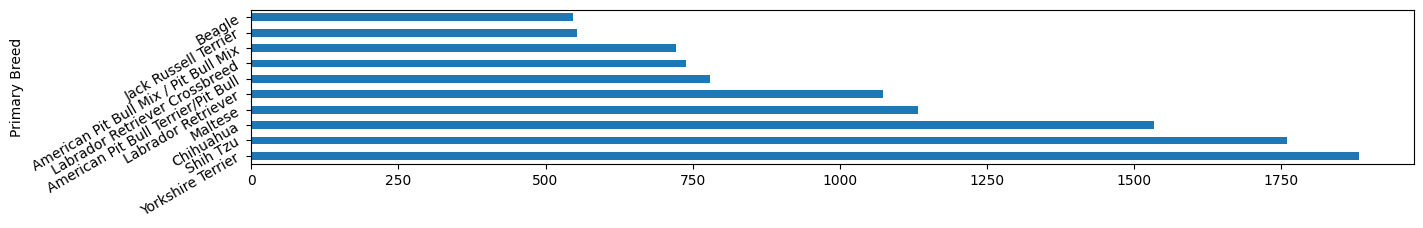

In [118]:
df['Primary Breed'].value_counts().head(10).plot(kind='barh', x='name', rot=30, figsize=(15,2))

## What are the most popular dog names?

In [28]:
df['Animal Name'].value_counts().head(10)

Animal Name
Max        202
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Lucky      106
Daisy       90
Name: count, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [35]:
df[df['Animal Name'] == 'Ioanna'].shape[0]

0

In [34]:
df[df['Animal Name'] == 'Max'].shape[0]

202

In [37]:
df[df['Animal Name'] == 'Maxwell'].shape[0]

11

## What percentage of dogs are guard dogs?

In [38]:
df['Guard or Trained'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Guard or Trained
No     99.9%
Yes     0.1%
Name: proportion, dtype: object

## What are the actual numbers?

In [39]:
df['Guard or Trained'].value_counts()

Guard or Trained
No     19809
Yes       17
Name: count, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll be a little more specific when using `.value_counts()`

In [40]:
df['Guard or Trained'].head()

0     No
1     No
2    NaN
3     No
4    NaN
Name: Guard or Trained, dtype: object

In [56]:
df['Guard or Trained'].value_counts(dropna=False)

Guard or Trained
No     19809
NaN    10174
Yes       17
Name: count, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

In this case, it seems nicer than missing data. Then check your result with another `.value_counts()`

In [58]:
df['Guard or Trained'] = df['Guard or Trained'].fillna('No')

df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647000,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647000,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713000,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417000,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707000,2014-09-12,2019-09-12


In [59]:
df['Guard or Trained'].value_counts()

Guard or Trained
No     29983
Yes       17
Name: count, dtype: int64

In [60]:
df['Guard or Trained'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Guard or Trained
No     99.9%
Yes     0.1%
Name: proportion, dtype: object

## What are the top dog breeds for guard dogs? 

In [69]:
df[df['Guard or Trained'] == 'Yes'].groupby('Primary Breed').size().nlargest()


Primary Breed
German Shepherd Dog           3
Doberman Pinscher             1
German Shepherd Crossbreed    1
Golden Retriever              1
Labrador Retriever            1
dtype: int64

## Create a new column called "year" that is the dog's year of birth

If `Animal Birth` is a datetime it makes things much easier.

In [73]:
df['year'] = df['Animal Birth'].dt.year
df

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647000,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647000,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713000,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417000,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707000,2014-09-12,2019-09-12,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,11372,Bella,F,NaN,Goldendoodle,CREAM,WHITE,TAN,2010-07-01,Yes,No,Yes,2015-08-22 19:00:39.303000,2015-08-22,2016-09-27,2010
29996,11417,Sadie,F,"Schnauzer, Miniature",NaN,BLACK,BROWN,NaN,2010-05-01,Yes,No,Yes,2015-08-22 19:03:08.003000,2015-08-22,2016-09-28,2010
29997,11228,NaN,M,Pomeranian,NaN,Tan,White,NaN,2014-03-01,Yes,No,Yes,2015-08-22 19:04:56.720000,2015-08-22,2016-08-22,2014
29998,11217,daisy,F,NaN,NaN,GRAY,WHITE,BLACK,2009-01-01,Yes,No,Yes,2015-08-22 19:14:30.177000,2015-08-22,2016-08-05,2009


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [75]:
current_year = pd.to_datetime('today').year
df['age'] = current_year - df['Animal Birth'].dt.year
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647000,2015-09-19,2016-09-19,2007,17
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647000,2014-09-20,2018-09-20,2013,11
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713000,2014-09-12,2019-09-12,2014,10
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417000,2014-09-12,2017-10-20,2008,16
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707000,2014-09-12,2019-09-12,2014,10


In [76]:
df['age'].mean()

14.712433333333333

In [77]:
df['age'].median()

14.0

<Axes: >

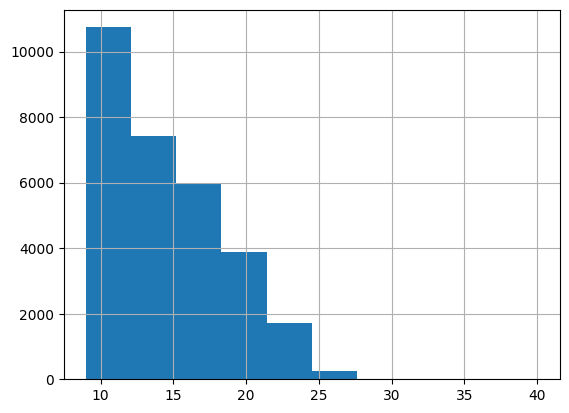

In [78]:
df['age'].hist()

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [79]:
df2 = pd.read_csv("zipcodes-neighborhoods.csv")
df2

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx
...,...,...,...
173,South Shore,10312,Staten Island
174,Stapleton and St. George,10301,Staten Island
175,Stapleton and St. George,10304,Staten Island
176,Stapleton and St. George,10305,Staten Island


In [80]:
df.rename(columns={'Owner Zip Code': 'zip'}, inplace=True)

In [82]:
merged = pd.merge(df, df2, on='zip', how ='left' )

In [83]:
merged

,zip,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647000,2015-09-19,2016-09-19,2007,17,Upper West Side,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647000,2014-09-20,2018-09-20,2013,11,Southeast Bronx,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713000,2014-09-12,2019-09-12,2014,10,Greenwich Village and Soho,Manhattan
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417000,2014-09-12,2017-10-20,2008,16,Upper West Side,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707000,2014-09-12,2019-09-12,2014,10,Greenwich Village and Soho,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,11372,Bella,F,NaN,Goldendoodle,CREAM,WHITE,TAN,2010-07-01,Yes,No,Yes,2015-08-22 19:00:39.303000,2015-08-22,2016-09-27,2010,14,West Queens,Queens
29996,11417,Sadie,F,"Schnauzer, Miniature",NaN,BLACK,BROWN,NaN,2010-05-01,Yes,No,Yes,2015-08-22 19:03:08.003000,2015-08-22,2016-09-28,2010,14,Southwest Queens,Queens
29997,11228,NaN,M,Pomeranian,NaN,Tan,White,NaN,2014-03-01,Yes,No,Yes,2015-08-22 19:04:56.720000,2015-08-22,2016-08-22,2014,10,Southwest Brooklyn,Brooklyn
29998,11217,daisy,F,NaN,NaN,GRAY,WHITE,BLACK,2009-01-01,Yes,No,Yes,2015-08-22 19:14:30.177000,2015-08-22,2016-08-05,2009,15,Northwest Brooklyn,Brooklyn


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [99]:
#most popular dog name in Bronx
merged[merged['borough'].str.contains('Bronx', na=False , case=False)]['Animal Name'].value_counts().head(1)

Animal Name
Bella    22
Name: count, dtype: int64

In [100]:
merged[merged['borough'].str.contains('Brooklyn', na=False)]['Animal Name'].value_counts().head(1)

Animal Name
Max    46
Name: count, dtype: int64

In [97]:
merged[merged['neighborhood'].str.contains('Upper East Side', na=False, case=False)]['Animal Name'].value_counts().head(1)

Animal Name
Charlie    19
Name: count, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [116]:
merged.groupby(['neighborhood', 'Primary Breed']).size().reset_index(name='count').sort_values('count', ascending=False).drop_duplicates('neighborhood')



,neighborhood,Primary Breed,count
3691,Upper West Side,Labrador Retriever,121
3969,West Queens,Shih Tzu,95
3537,Upper East Side,Havanese,94
2805,South Shore,Shih Tzu,90
3092,Southern Brooklyn,Yorkshire Terrier,85
2912,Southeast Bronx,Shih Tzu,83
713,Chelsea and Clinton,Chihuahua,80
1816,Lower East Side,Chihuahua,77
3878,West Central Queens,Yorkshire Terrier,72
2389,Northwest Brooklyn,Labrador Retriever,72


## What breed of dogs are the least likely to be spayed/neutered? Male or female?

In [128]:
merged[merged['Spayed or Neut']== 'No'].groupby('Primary Breed').size().idxmin()

'Afghan Hound'

In [129]:
merged[merged['Spayed or Neut'] == 'No'].groupby('Animal Gender').size().idxmin()

'F'

## How many dogs are in each borough? Plot it in a graph.

When plotting, use `kind='barh'`. I didn't say this in class, but horizontal bar graphs are the only graphs I like!

In [135]:
merged['borough'].value_counts()

borough
Manhattan        10478
Brooklyn          7466
Queens            6154
Bronx             2748
Staten Island     2727
Name: count, dtype: int64

<Axes: ylabel='borough'>

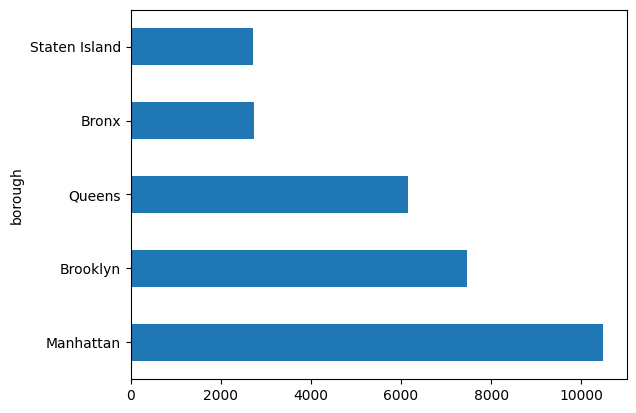

In [136]:
merged['borough'].value_counts().plot(kind='barh')


## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [138]:
df3 = pd.read_csv("boro_population.csv")
df3

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [139]:
merged_df = pd.merge(merged, df3, on='borough', how ='left' )

In [141]:
merged_df

,zip,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,...,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,borough,population,area_sqmi
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,...,Yes,2012-09-19 16:01:19.647000,2015-09-19,2016-09-19,2007,17,Upper West Side,Manhattan,1644518.0,23.0
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,...,Yes,2013-09-20 11:41:36.647000,2014-09-20,2018-09-20,2013,11,Southeast Bronx,Bronx,1455444.0,42.0
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,...,No,2014-09-12 13:13:36.713000,2014-09-12,2019-09-12,2014,10,Greenwich Village and Soho,Manhattan,1644518.0,23.0
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,...,Yes,2014-09-12 15:26:51.417000,2014-09-12,2017-10-20,2008,16,Upper West Side,Manhattan,1644518.0,23.0
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,...,No,2014-09-12 15:43:17.707000,2014-09-12,2019-09-12,2014,10,Greenwich Village and Soho,Manhattan,1644518.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,11372,Bella,F,NaN,Goldendoodle,CREAM,WHITE,TAN,2010-07-01,Yes,...,Yes,2015-08-22 19:00:39.303000,2015-08-22,2016-09-27,2010,14,West Queens,Queens,2339150.0,109.0
29996,11417,Sadie,F,"Schnauzer, Miniature",NaN,BLACK,BROWN,NaN,2010-05-01,Yes,...,Yes,2015-08-22 19:03:08.003000,2015-08-22,2016-09-28,2010,14,Southwest Queens,Queens,2339150.0,109.0
29997,11228,NaN,M,Pomeranian,NaN,Tan,White,NaN,2014-03-01,Yes,...,Yes,2015-08-22 19:04:56.720000,2015-08-22,2016-08-22,2014,10,Southwest Brooklyn,Brooklyn,2636735.0,71.0
29998,11217,daisy,F,NaN,NaN,GRAY,WHITE,BLACK,2009-01-01,Yes,...,Yes,2015-08-22 19:14:30.177000,2015-08-22,2016-08-05,2009,15,Northwest Brooklyn,Brooklyn,2636735.0,71.0


In [151]:
merged_df['borough'].value_counts() / merged_df['population'].idxmax()

borough
Manhattan        952.545455
Brooklyn         678.727273
Queens           559.454545
Bronx            249.818182
Staten Island    247.909091
Name: count, dtype: float64

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

In [178]:
top_5 = merged_df.groupby(['borough', 'Primary Breed']).size().reset_index(name='count').sort_values(['borough', 'count'], ascending=[True, False]).groupby('borough').head(5)
top_5

,borough,Primary Breed,count
145,Bronx,Yorkshire Terrier,250
128,Bronx,Shih Tzu,244
41,Bronx,Chihuahua,208
7,Bronx,American Pit Bull Terrier/Pit Bull,181
90,Bronx,Maltese,139
353,Brooklyn,Yorkshire Terrier,501
325,Brooklyn,Shih Tzu,481
198,Brooklyn,Chihuahua,391
262,Brooklyn,Labrador Retriever,255
267,Brooklyn,Maltese,247


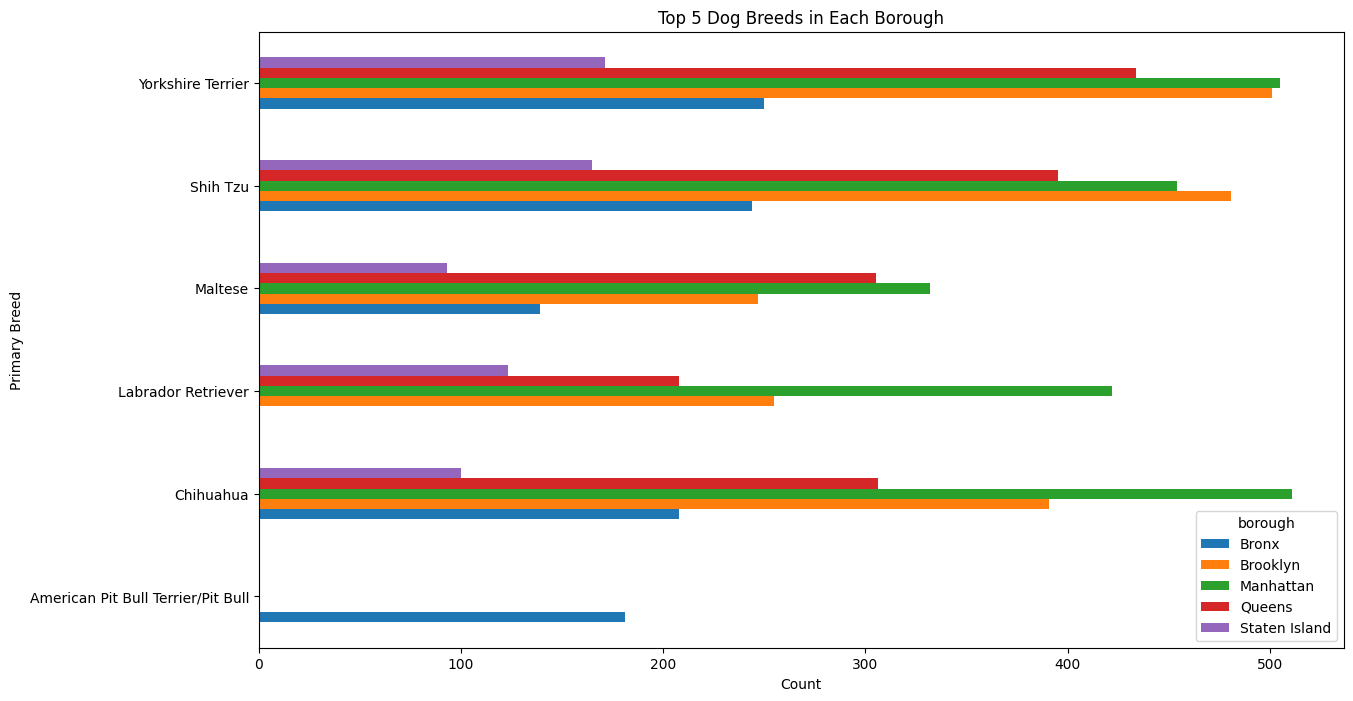

In [179]:
top_5.pivot(index='Primary Breed', columns='borough', values='count').plot(kind='barh', figsize=(14, 8), title='Top 5 Dog Breeds in Each Borough')
plt.xlabel('Count')
plt.show()
